# 🎵 Kaggle Playground Series – Season 5, Episode 9  
### Predicting Song BPM  

This notebook explores the **Kaggle Playground Series – Season 5, Episode 9** competition, where the goal is to **predict the beats-per-minute (BPM) of songs** from a set of features generated by a deep learning model trained on the original BPM Prediction Challenge dataset.  

---

## 📑 Notebook Outline  
1. **Exploratory Data Analysis (EDA):** understand the dataset, feature distributions, and relationships with the target variable.  
2. **Data Visualization:** highlight trends, correlations, and patterns that may guide feature engineering.  
3. **Baseline Modeling:** start with simple regression models and move towards tree-based models.  
4. **Model Tuning & Ensembling:** optimize models and combine predictions for improved performance.  
5. **Submission Preparation:** generate predictions for the test set and create a submission file.  

---

In [1]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
data_path = kagglehub.competition_download('playground-series-s5e9')

print('Data source import complete.')

100%|██████████| 33.3M/33.3M [00:02<00:00, 12.5MB/s]

Extracting files...


Data source import complete.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

# EDA

In [6]:
data.shape

(524164, 11)

In [7]:
data.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [8]:
data.tail()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
524159,524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235
524163,524163,0.776515,-5.484091,0.023500,0.271189,0.067338,0.339319,0.793487,313870.0566,0.223933,77.45960


In [9]:
data.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [11]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

                           Missing Values  Percentage (%)
id                                      0             0.0
RhythmScore                             0             0.0
AudioLoudness                           0             0.0
VocalContent                            0             0.0
AcousticQuality                         0             0.0
InstrumentalScore                       0             0.0
LivePerformanceLikelihood               0             0.0
MoodScore                               0             0.0
TrackDurationMs                         0             0.0
Energy                                  0             0.0
BeatsPerMinute                          0             0.0


In [12]:
data.nunique()

,0
id,524164
RhythmScore,322528
AudioLoudness,310411
VocalContent,229305
AcousticQuality,270478
InstrumentalScore,218979
LivePerformanceLikelihood,279591
MoodScore,306504
TrackDurationMs,377442
Energy,11606


# Data visualisation

Target variable distribution

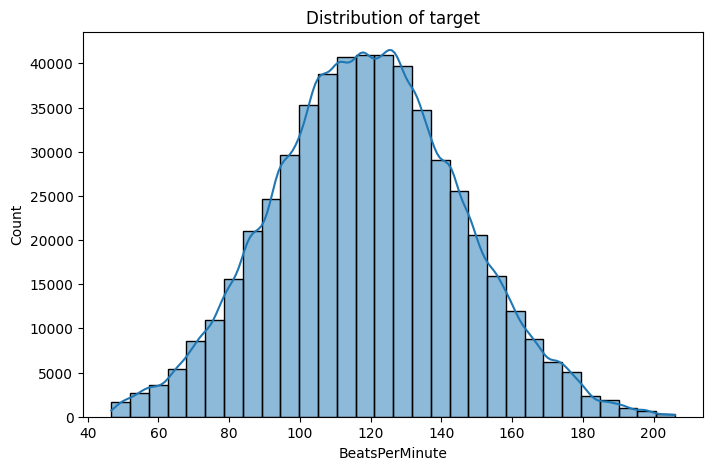

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data['BeatsPerMinute'], kde=True, bins=30)
plt.title(f"Distribution of target")
plt.show()

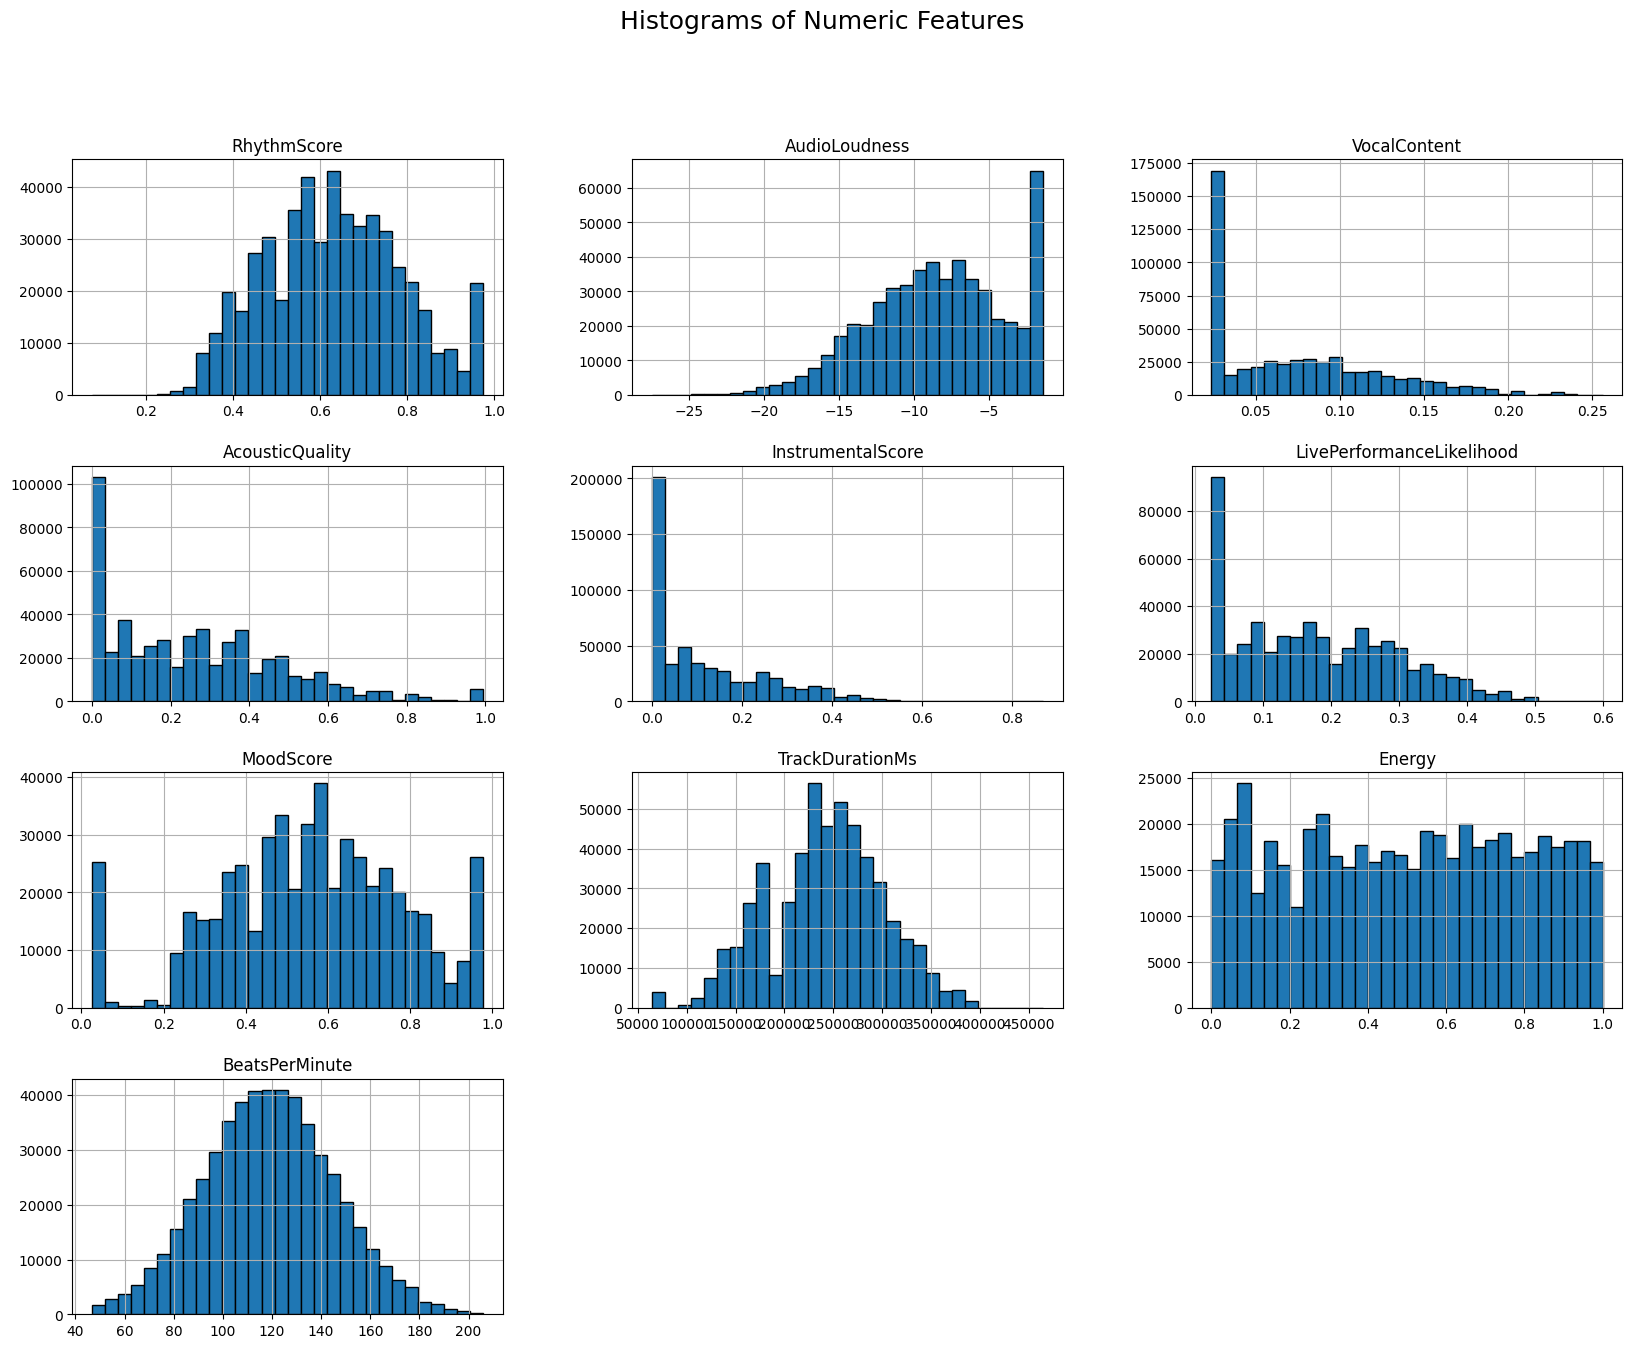

In [14]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('id')

data[numeric_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=18)
plt.show()

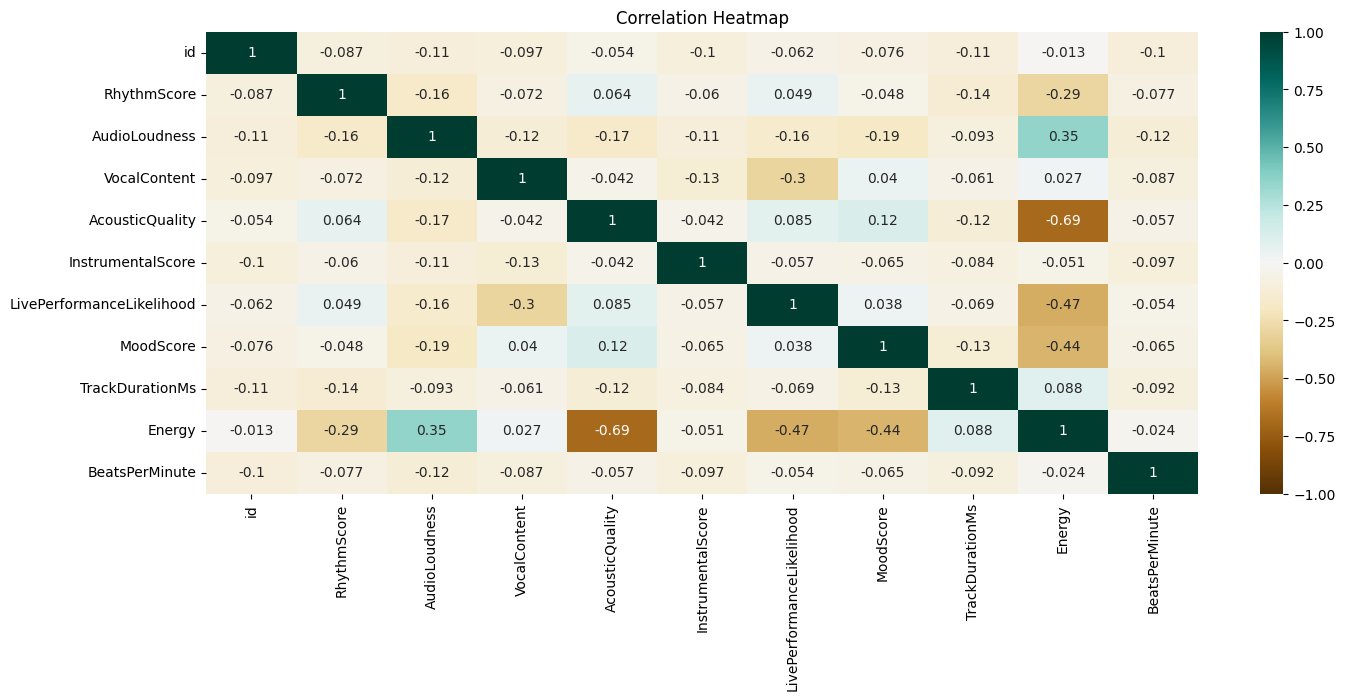

In [15]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

Top 5 correlated features with target

In [16]:
correlations = data[numeric_cols].corr()['BeatsPerMinute']
correlations = correlations.drop('BeatsPerMinute')

top_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 features correlated with target:")
print(correlations[top_features])

Top 5 features correlated with target:
MoodScore          0.007059
TrackDurationMs    0.006637
RhythmScore        0.005440
VocalContent       0.004876
Energy            -0.004375
Name: BeatsPerMinute, dtype: float64


Scatter plots for top 5 correlated features with target

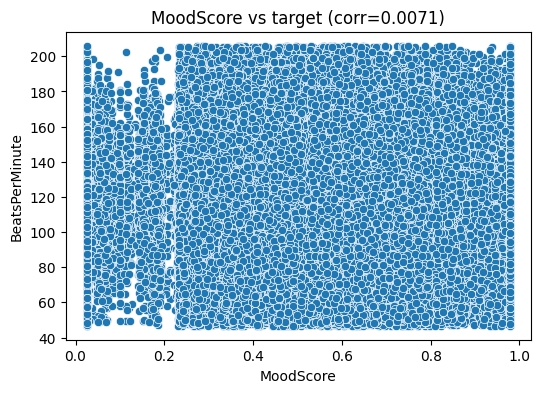

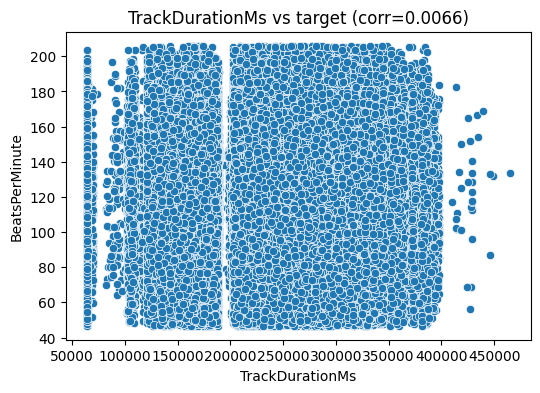

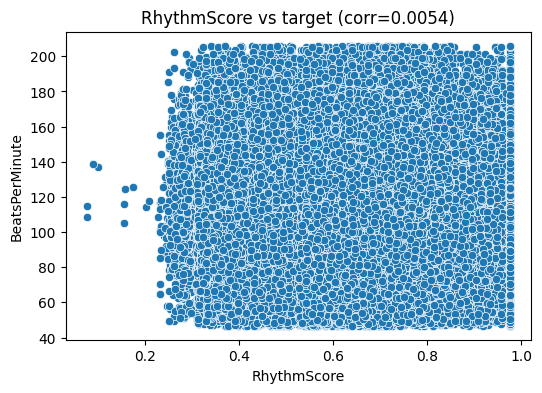

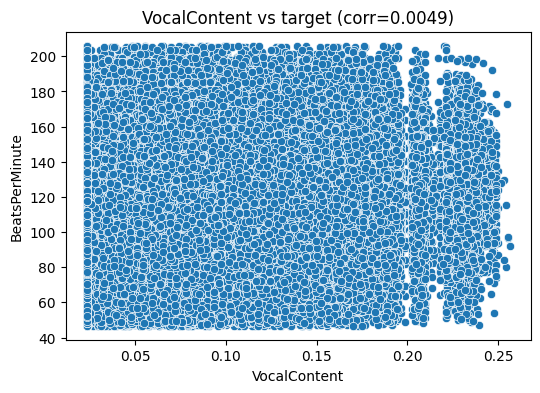

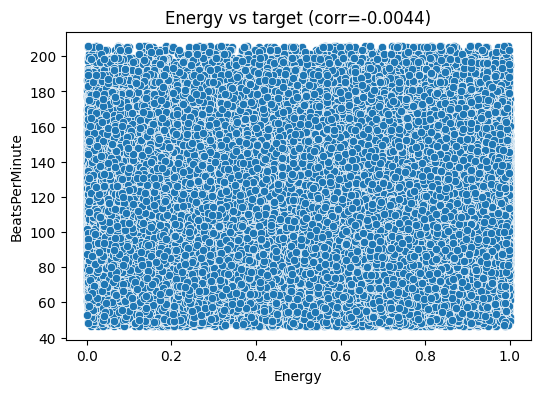

In [17]:
for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[feature], y=data['BeatsPerMinute'])
    plt.title(f"{feature} vs target (corr={correlations[feature]:.4f})")
    plt.show()

Boxplots for outliers detection

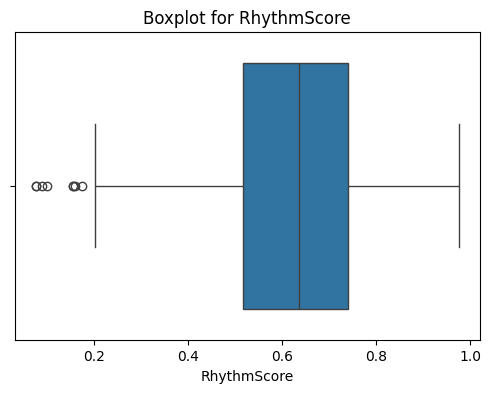

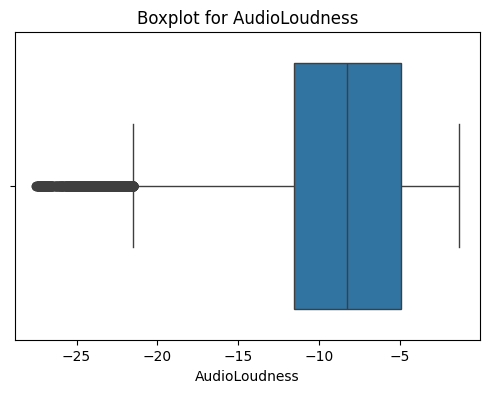

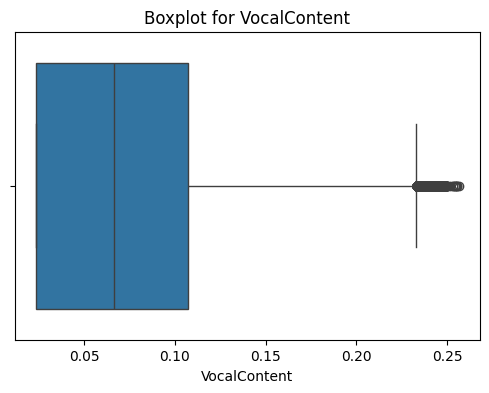

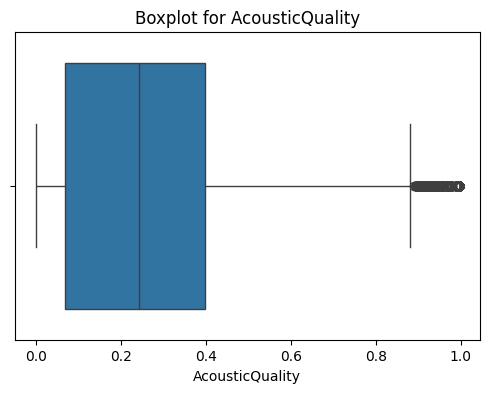

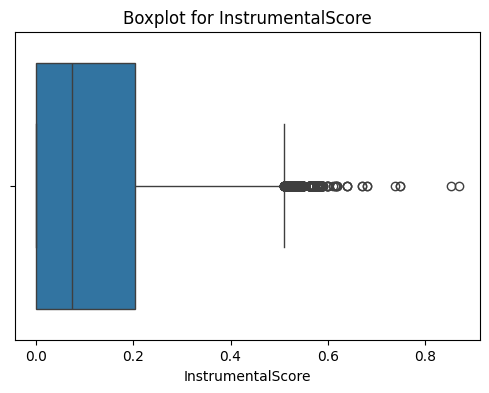

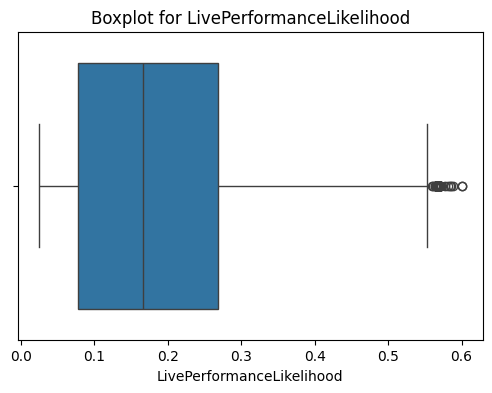

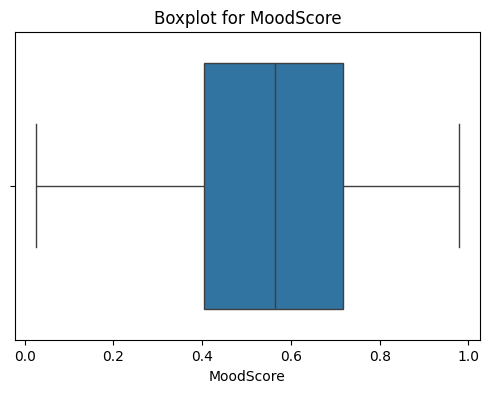

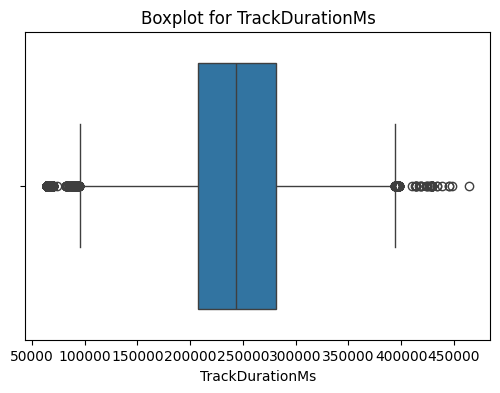

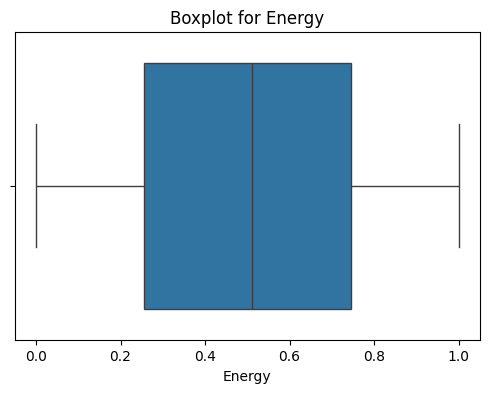

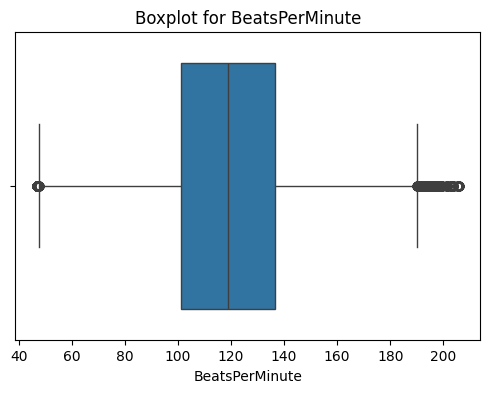

In [18]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('id')

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Data preprocessing

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline

In [20]:
X = data.drop(['BeatsPerMinute', 'id'], axis=1)
y = data['BeatsPerMinute']

In [21]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
test_id = test_data['id']
test_data = test_data.drop('id', axis=1)

In [23]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
test_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns, index=test_data.index)

# Model building

In [34]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 24.8 MB/s eta 0:00:00


In [35]:
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error
import optuna

In [27]:
# params = {
#     "objective": "regression",
#     "metric": "rmse",
#     "boosting_type": "gbdt",
#     "n_estimators": 5000,
#     "learning_rate": 0.01,
#     "num_leaves": 31,
#     "max_depth": -1,
#     "feature_fraction": 0.8,
#     "bagging_fraction": 0.8,
#     "bagging_freq": 5,
#     "lambda_l1": 0.1,
#     "lambda_l2": 0.1,
#     "min_child_samples": 20,
#     "verbose": -1,
#     "random_state": 42
# }

In [38]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "n_estimators": 5000,
        "learning_rate": 0.01,
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "max_depth": trial.suggest_int("max_depth", -1, 12),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 1.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 1.0),
        "verbose": -1,
        "random_state": 42,
        "num_threads": -1,
    }

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, valid_idx in kf.split(X_scaled, y):
        X_train, X_valid = X_scaled.iloc[train_idx], X_scaled.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = lgb.LGBMRegressor(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            eval_metric="rmse",
            callbacks=[lgb.early_stopping(300)],
        )

        preds = model.predict(X_valid, num_iteration=model.best_iteration_)
        rmse_scores.append(root_mean_squared_error(y_valid, preds))

    return np.mean(rmse_scores)

In [39]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)
print("Best RMSE:", study.best_value)

[I 2025-09-03 19:52:04,809] A new study created in memory with name: no-name-fd24666c-6eb6-40a8-a58c-98dbc4588bea


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[117]	valid_0's rmse: 26.4737
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[140]	valid_0's rmse: 26.4805
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[134]	valid_0's rmse: 26.4326


[I 2025-09-03 19:53:05,916] Trial 0 finished with value: 26.462226842606373 and parameters: {'num_leaves': 198, 'max_depth': 9, 'feature_fraction': 0.706708579361682, 'bagging_fraction': 0.6901401260112164, 'bagging_freq': 1, 'min_child_samples': 19, 'lambda_l1': 0.9338715610546939, 'lambda_l2': 0.31322081066087426}. Best is trial 0 with value: 26.462226842606373.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[192]	valid_0's rmse: 26.4723
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[236]	valid_0's rmse: 26.4792
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[302]	valid_0's rmse: 26.4305


[I 2025-09-03 19:54:03,456] Trial 1 finished with value: 26.46066718255791 and parameters: {'num_leaves': 68, 'max_depth': 11, 'feature_fraction': 0.6855322218403228, 'bagging_fraction': 0.7942309150420607, 'bagging_freq': 4, 'min_child_samples': 39, 'lambda_l1': 0.8659613885291377, 'lambda_l2': 0.07976966807809416}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[50]	valid_0's rmse: 26.4749
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[79]	valid_0's rmse: 26.4814
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[98]	valid_0's rmse: 26.4322


[I 2025-09-03 19:55:06,253] Trial 2 finished with value: 26.46279951684295 and parameters: {'num_leaves': 149, 'max_depth': 8, 'feature_fraction': 0.9971346587241139, 'bagging_fraction': 0.615188813466127, 'bagging_freq': 7, 'min_child_samples': 72, 'lambda_l1': 0.6761930083559169, 'lambda_l2': 0.6209153719428772}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[900]	valid_0's rmse: 26.4733
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[737]	valid_0's rmse: 26.4817
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[1888]	valid_0's rmse: 26.4335


[I 2025-09-03 19:56:07,812] Trial 3 finished with value: 26.46283796969008 and parameters: {'num_leaves': 50, 'max_depth': 1, 'feature_fraction': 0.8584279476247737, 'bagging_fraction': 0.7866608986660351, 'bagging_freq': 4, 'min_child_samples': 49, 'lambda_l1': 0.8881301918939211, 'lambda_l2': 0.6573477961768536}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[176]	valid_0's rmse: 26.4729
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[193]	valid_0's rmse: 26.4804
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[235]	valid_0's rmse: 26.4303


[I 2025-09-03 19:57:15,920] Trial 4 finished with value: 26.46121239211767 and parameters: {'num_leaves': 155, 'max_depth': 6, 'feature_fraction': 0.7157407102098906, 'bagging_fraction': 0.997725406365769, 'bagging_freq': 8, 'min_child_samples': 22, 'lambda_l1': 0.5071949762141723, 'lambda_l2': 0.17156509776791418}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[570]	valid_0's rmse: 26.4721
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[598]	valid_0's rmse: 26.4801
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[946]	valid_0's rmse: 26.4318


[I 2025-09-03 19:58:20,896] Trial 5 finished with value: 26.461340954231115 and parameters: {'num_leaves': 130, 'max_depth': 2, 'feature_fraction': 0.8794342006526891, 'bagging_fraction': 0.8872133263483628, 'bagging_freq': 2, 'min_child_samples': 75, 'lambda_l1': 0.3566022642959549, 'lambda_l2': 0.7491446885545582}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[166]	valid_0's rmse: 26.4728
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[197]	valid_0's rmse: 26.4798
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[174]	valid_0's rmse: 26.4313


[I 2025-09-03 19:59:19,029] Trial 6 finished with value: 26.461312791725977 and parameters: {'num_leaves': 106, 'max_depth': -1, 'feature_fraction': 0.6674712062119958, 'bagging_fraction': 0.6102787925030214, 'bagging_freq': 9, 'min_child_samples': 55, 'lambda_l1': 0.8003223587773125, 'lambda_l2': 0.8357298970070699}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[144]	valid_0's rmse: 26.4728
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[165]	valid_0's rmse: 26.4807
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[243]	valid_0's rmse: 26.4304


[I 2025-09-03 20:00:18,585] Trial 7 finished with value: 26.461305132541796 and parameters: {'num_leaves': 88, 'max_depth': 8, 'feature_fraction': 0.6441106712626791, 'bagging_fraction': 0.9696963092127546, 'bagging_freq': 9, 'min_child_samples': 10, 'lambda_l1': 0.5595954743863463, 'lambda_l2': 0.4154944901092398}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[218]	valid_0's rmse: 26.4735
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[219]	valid_0's rmse: 26.4816
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[333]	valid_0's rmse: 26.4311


[I 2025-09-03 20:01:21,858] Trial 8 finished with value: 26.462059586392275 and parameters: {'num_leaves': 134, 'max_depth': 0, 'feature_fraction': 0.6075872210613773, 'bagging_fraction': 0.8818454163066898, 'bagging_freq': 5, 'min_child_samples': 13, 'lambda_l1': 0.9358646788225814, 'lambda_l2': 0.9252675019205795}. Best is trial 1 with value: 26.46066718255791.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[168]	valid_0's rmse: 26.4725
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[162]	valid_0's rmse: 26.479
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[220]	valid_0's rmse: 26.4297


[I 2025-09-03 20:02:21,482] Trial 9 finished with value: 26.460380733958278 and parameters: {'num_leaves': 139, 'max_depth': 5, 'feature_fraction': 0.9511056046550215, 'bagging_fraction': 0.9116916404161288, 'bagging_freq': 10, 'min_child_samples': 79, 'lambda_l1': 0.783451963837073, 'lambda_l2': 0.23612849123396173}. Best is trial 9 with value: 26.460380733958278.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[171]	valid_0's rmse: 26.4723
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[172]	valid_0's rmse: 26.4784
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[522]	valid_0's rmse: 26.4293


[I 2025-09-03 20:03:19,840] Trial 10 finished with value: 26.459989756799512 and parameters: {'num_leaves': 27, 'max_depth': 4, 'feature_fraction': 0.9939058739643104, 'bagging_fraction': 0.8924535533720741, 'bagging_freq': 10, 'min_child_samples': 100, 'lambda_l1': 0.020241234394415553, 'lambda_l2': 0.006617672445365652}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[410]	valid_0's rmse: 26.4719
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[439]	valid_0's rmse: 26.4788
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[581]	valid_0's rmse: 26.4297


[I 2025-09-03 20:04:18,590] Trial 11 finished with value: 26.460159068530146 and parameters: {'num_leaves': 22, 'max_depth': 3, 'feature_fraction': 0.9978272931671617, 'bagging_fraction': 0.8900606174775447, 'bagging_freq': 10, 'min_child_samples': 100, 'lambda_l1': 0.09432706950425607, 'lambda_l2': 0.014870785947462372}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[170]	valid_0's rmse: 26.472
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[200]	valid_0's rmse: 26.4786
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[261]	valid_0's rmse: 26.4299


[I 2025-09-03 20:05:06,126] Trial 12 finished with value: 26.4601959280929 and parameters: {'num_leaves': 20, 'max_depth': 4, 'feature_fraction': 0.9377900202412355, 'bagging_fraction': 0.8334873685118082, 'bagging_freq': 10, 'min_child_samples': 95, 'lambda_l1': 0.006842296712315468, 'lambda_l2': 0.03927803831158078}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[419]	valid_0's rmse: 26.4713
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[357]	valid_0's rmse: 26.479
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[370]	valid_0's rmse: 26.4305


[I 2025-09-03 20:06:00,159] Trial 13 finished with value: 26.46027107103456 and parameters: {'num_leaves': 22, 'max_depth': 3, 'feature_fraction': 0.9986475055347456, 'bagging_fraction': 0.9344283834658845, 'bagging_freq': 7, 'min_child_samples': 97, 'lambda_l1': 0.053848935729714886, 'lambda_l2': 0.401412749464094}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[161]	valid_0's rmse: 26.4723
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[251]	valid_0's rmse: 26.4792
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[204]	valid_0's rmse: 26.4304


[I 2025-09-03 20:06:56,386] Trial 14 finished with value: 26.460600231660617 and parameters: {'num_leaves': 52, 'max_depth': 5, 'feature_fraction': 0.7875458609865909, 'bagging_fraction': 0.826550197059371, 'bagging_freq': 7, 'min_child_samples': 87, 'lambda_l1': 0.2160376327659237, 'lambda_l2': 0.0075036700448380955}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[809]	valid_0's rmse: 26.4717
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[769]	valid_0's rmse: 26.4802
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[1480]	valid_0's rmse: 26.4315


[I 2025-09-03 20:08:09,731] Trial 15 finished with value: 26.461115387017824 and parameters: {'num_leaves': 46, 'max_depth': 2, 'feature_fraction': 0.9025440577864883, 'bagging_fraction': 0.7312225702389489, 'bagging_freq': 10, 'min_child_samples': 99, 'lambda_l1': 0.1578714210698265, 'lambda_l2': 0.17203792156759332}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[166]	valid_0's rmse: 26.4725
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[222]	valid_0's rmse: 26.4795
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[221]	valid_0's rmse: 26.4298


[I 2025-09-03 20:09:17,762] Trial 16 finished with value: 26.46060563006894 and parameters: {'num_leaves': 80, 'max_depth': 6, 'feature_fraction': 0.8125690359742082, 'bagging_fraction': 0.8618469840928938, 'bagging_freq': 9, 'min_child_samples': 61, 'lambda_l1': 0.31255078861185565, 'lambda_l2': 0.5059285881934859}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[271]	valid_0's rmse: 26.4717
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[453]	valid_0's rmse: 26.4789
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[545]	valid_0's rmse: 26.4308


[I 2025-09-03 20:10:14,967] Trial 17 finished with value: 26.460461244721188 and parameters: {'num_leaves': 39, 'max_depth': 3, 'feature_fraction': 0.9523350465568099, 'bagging_fraction': 0.9469675986935394, 'bagging_freq': 6, 'min_child_samples': 85, 'lambda_l1': 0.133599148061413, 'lambda_l2': 0.14950304417646532}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 26.472
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 26.4801
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[161]	valid_0's rmse: 26.4299


[I 2025-09-03 20:11:19,707] Trial 18 finished with value: 26.46065262164161 and parameters: {'num_leaves': 71, 'max_depth': 7, 'feature_fraction': 0.8212287462606296, 'bagging_fraction': 0.7400140723492591, 'bagging_freq': 8, 'min_child_samples': 66, 'lambda_l1': 0.28543525738663483, 'lambda_l2': 0.2851907499101298}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[144]	valid_0's rmse: 26.4733
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[133]	valid_0's rmse: 26.4806
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[191]	valid_0's rmse: 26.4302


[I 2025-09-03 20:12:21,498] Trial 19 finished with value: 26.461370925941566 and parameters: {'num_leaves': 103, 'max_depth': 11, 'feature_fraction': 0.7746502591536611, 'bagging_fraction': 0.8471488087717203, 'bagging_freq': 8, 'min_child_samples': 86, 'lambda_l1': 0.4045558036154946, 'lambda_l2': 0.00984969058491499}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[229]	valid_0's rmse: 26.4719
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[190]	valid_0's rmse: 26.4789
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[390]	valid_0's rmse: 26.43


[I 2025-09-03 20:13:16,931] Trial 20 finished with value: 26.460253196378584 and parameters: {'num_leaves': 32, 'max_depth': 4, 'feature_fraction': 0.9213470398774685, 'bagging_fraction': 0.9110978163442521, 'bagging_freq': 10, 'min_child_samples': 30, 'lambda_l1': 0.09844433612098995, 'lambda_l2': 0.11969504955435567}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[204]	valid_0's rmse: 26.4722
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[195]	valid_0's rmse: 26.4787
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[264]	valid_0's rmse: 26.4298


[I 2025-09-03 20:14:06,672] Trial 21 finished with value: 26.460202628574667 and parameters: {'num_leaves': 20, 'max_depth': 4, 'feature_fraction': 0.9649157769182155, 'bagging_fraction': 0.8446310224210652, 'bagging_freq': 10, 'min_child_samples': 93, 'lambda_l1': 0.0041834464500954405, 'lambda_l2': 0.004842857185440344}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[450]	valid_0's rmse: 26.4716
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[232]	valid_0's rmse: 26.4789
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[493]	valid_0's rmse: 26.4304


[I 2025-09-03 20:14:57,305] Trial 22 finished with value: 26.460292046421362 and parameters: {'num_leaves': 58, 'max_depth': 3, 'feature_fraction': 0.9260179615685102, 'bagging_fraction': 0.8059483876227197, 'bagging_freq': 9, 'min_child_samples': 100, 'lambda_l1': 0.014407545462756272, 'lambda_l2': 0.0656600970965185}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[1000]	valid_0's rmse: 26.4732
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[990]	valid_0's rmse: 26.4819
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[550]	valid_0's rmse: 26.434


[I 2025-09-03 20:15:41,563] Trial 23 finished with value: 26.463015093560468 and parameters: {'num_leaves': 34, 'max_depth': 1, 'feature_fraction': 0.9702965169431375, 'bagging_fraction': 0.7583099186500909, 'bagging_freq': 10, 'min_child_samples': 90, 'lambda_l1': 0.2102933255245607, 'lambda_l2': 0.21034527729891075}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[207]	valid_0's rmse: 26.4722
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[171]	valid_0's rmse: 26.4787
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[495]	valid_0's rmse: 26.4292


[I 2025-09-03 20:16:39,695] Trial 24 finished with value: 26.46002109373838 and parameters: {'num_leaves': 21, 'max_depth': 4, 'feature_fraction': 0.9978590003290739, 'bagging_fraction': 0.8894804529911532, 'bagging_freq': 9, 'min_child_samples': 81, 'lambda_l1': 0.09101923344226681, 'lambda_l2': 0.09086894669022483}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[799]	valid_0's rmse: 26.4721
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[420]	valid_0's rmse: 26.4801
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[871]	valid_0's rmse: 26.4317


[I 2025-09-03 20:17:39,091] Trial 25 finished with value: 26.46131536896256 and parameters: {'num_leaves': 63, 'max_depth': 2, 'feature_fraction': 0.9929553102651274, 'bagging_fraction': 0.8934230951531904, 'bagging_freq': 8, 'min_child_samples': 80, 'lambda_l1': 0.21286569087887983, 'lambda_l2': 0.11137242657192126}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[154]	valid_0's rmse: 26.4721
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[216]	valid_0's rmse: 26.4782
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[243]	valid_0's rmse: 26.4298


[I 2025-09-03 20:18:36,507] Trial 26 finished with value: 26.460021294989758 and parameters: {'num_leaves': 34, 'max_depth': 5, 'feature_fraction': 0.8814569697187756, 'bagging_fraction': 0.9517237737320149, 'bagging_freq': 9, 'min_child_samples': 70, 'lambda_l1': 0.10709906518367873, 'lambda_l2': 0.3527419261943731}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[79]	valid_0's rmse: 26.4741
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[114]	valid_0's rmse: 26.4805
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[148]	valid_0's rmse: 26.431


[I 2025-09-03 20:19:43,490] Trial 27 finished with value: 26.46185260950895 and parameters: {'num_leaves': 89, 'max_depth': 7, 'feature_fraction': 0.8680520218322254, 'bagging_fraction': 0.9995595294382993, 'bagging_freq': 6, 'min_child_samples': 66, 'lambda_l1': 0.39556403377602356, 'lambda_l2': 0.4575696114431469}. Best is trial 10 with value: 26.459989756799512.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[153]	valid_0's rmse: 26.472
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[170]	valid_0's rmse: 26.4781
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[240]	valid_0's rmse: 26.4297


[I 2025-09-03 20:20:40,711] Trial 28 finished with value: 26.459936085844447 and parameters: {'num_leaves': 38, 'max_depth': 6, 'feature_fraction': 0.8932654019275436, 'bagging_fraction': 0.9542946341756282, 'bagging_freq': 9, 'min_child_samples': 71, 'lambda_l1': 0.15530183120230664, 'lambda_l2': 0.32150990684035397}. Best is trial 28 with value: 26.459936085844447.


Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[82]	valid_0's rmse: 26.4737
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[98]	valid_0's rmse: 26.4812
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[124]	valid_0's rmse: 26.4312


[I 2025-09-03 20:21:37,700] Trial 29 finished with value: 26.46201951715652 and parameters: {'num_leaves': 173, 'max_depth': 9, 'feature_fraction': 0.8401677420780401, 'bagging_fraction': 0.9701419024272829, 'bagging_freq': 1, 'min_child_samples': 80, 'lambda_l1': 0.1658984331395855, 'lambda_l2': 0.29646605632705286}. Best is trial 28 with value: 26.459936085844447.


Best params: {'num_leaves': 38, 'max_depth': 6, 'feature_fraction': 0.8932654019275436, 'bagging_fraction': 0.9542946341756282, 'bagging_freq': 9, 'min_child_samples': 71, 'lambda_l1': 0.15530183120230664, 'lambda_l2': 0.32150990684035397}
Best RMSE: 26.459936085844447


In [40]:
best_params = study.best_params
best_params.update({"objective": "regression", "metric": "rmse", "n_estimators": 5000, "learning_rate": 0.01})

lgb_model = lgb.LGBMRegressor(**best_params)
lgb_model.fit(X, y)

LGBMRegressor(bagging_fraction=0.9542946341756282, bagging_freq=9,
              feature_fraction=0.8932654019275436,
              lambda_l1=0.15530183120230664, lambda_l2=0.32150990684035397,
              learning_rate=0.01, max_depth=6, metric='rmse',
              min_child_samples=71, n_estimators=5000, num_leaves=38,
              objective='regression')

In [41]:
test_preds = lgb_model.predict(test_scaled, num_iteration=lgb_model.best_iteration_)

In [28]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# oof_preds = np.zeros(len(X))
# test_preds = np.zeros(len(test_scaled))

# for fold, (train_idx, valid_idx) in enumerate(kf.split(X_scaled, y)):
#     print(f"Training fold {fold+1}...")
#     X_train, X_valid = X_scaled.iloc[train_idx], X_scaled.iloc[valid_idx]
#     y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

#     model = lgb.LGBMRegressor(**params)
#     model.fit(
#         X_train, y_train,
#         eval_set=[(X_valid, y_valid)],
#         eval_metric="rmse",
#         callbacks=[
#         lgb.early_stopping(stopping_rounds=300)]
#         )

#     oof_preds[valid_idx] = model.predict(X_valid, num_iteration=model.best_iteration_)
#     test_preds += model.predict(test_scaled, num_iteration=model.best_iteration_) / kf.n_splits

# rmse = root_mean_squared_error(y, oof_preds)
# print(f"OOF RMSE: {rmse:.5f}")

Training fold 1...
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[233]	valid_0's rmse: 26.4378
Training fold 2...
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[275]	valid_0's rmse: 26.483
Training fold 3...
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[301]	valid_0's rmse: 26.5232
Training fold 4...
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[354]	valid_0's rmse: 26.4435
Training fold 5...
Training until validation scores don't improve for 300 rounds
Early stopping, best iteration is:
[318]	valid_0's rmse: 26.4072
OOF RMSE: 700.07769


# Submission

In [42]:
submission = pd.DataFrame({
    'id': test_id,
    'y': test_preds
})

In [43]:
submission

,id,y
0,524164,123.078143
1,524165,122.826725
2,524166,119.024337
3,524167,109.864627
4,524168,117.447823
...,...,...
174717,698881,123.117909
174718,698882,116.208150
174719,698883,115.580903
174720,698884,121.941325


In [44]:
submission.to_csv('submission.csv', index=False)